In [27]:
lambda x: ((x % 2 and 'odd') or 'even')(4)

<function __main__.<lambda>(x)>

In [28]:
(lambda x: ((x % 2 and 'odd') or 'even'))(4)

'even'

In [22]:
(lambda x, y: x*y)(2,3)

6

In [49]:
primos = [2,3]
for x in range(4, 8):
    a =[(lambda x: x%i)(x) for i in primos]
    print(a)

[0, 1]
[1, 2]
[0, 0]
[1, 1]


In [20]:
primos =[2,3]

In [60]:
0 in [0,0,0] 

True

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy.optimize as opt
import csv

In [79]:
primos = [2,3]

In [83]:
n = 100000
for i in range(10000,n):
    m = [(lambda i: i%p)(i) for p in primos]
    if 0 not in m:
        primos.append(i)

In [119]:
primos[:100]

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541]

In [110]:
len(primos)

9592

In [118]:
with open('primos.csv', 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(primos)

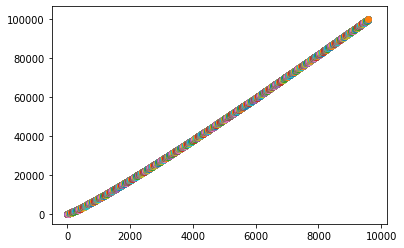

In [86]:
for i in range(len(primos)):
    plt.scatter(i,primos[i])
plt.show()

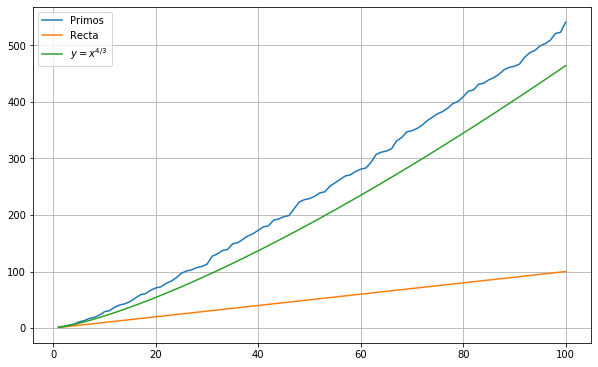

In [492]:
x = np.linspace(1,len(primos[:100]),len(primos[:100]))
plt.figure(figsize=(10,6.18))
plt.plot(x, primos[:100], label ='Primos')
plt.plot(x, x, label='Recta')
plt.plot(x, x**(4/3), label='$y = x^{4/3}$')
plt.legend(loc='best')
plt.grid()
plt.show()

In [243]:
len(primos)

9592

In [267]:
m=9592
x = np.linspace(1,len(primos[:m]),len(primos[:m]))

In [268]:
def obj3(b,x,y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2-b[3]*x**3-b[4]*x**4)**2)
b0= np.random.random((5,))
res = opt.minimize(obj3, b0, args =(x,primos[:m]))
yhat3= res.x[0]+res.x[1]*x+res.x[2]*x**2+res.x[3]*x**3+res.x[4]*x**4

In [269]:
def obj2(b,x,y):
    return np.sum((y-b[0]-b[1]*x-b[2]*x**2)**2)
b0= np.random.random((3,))
res = opt.minimize(obj2, b0, args =(x,primos[:m]))
yhat2= res.x[0]+res.x[1]*x+res.x[2]*x**2
yhat2 = np.round(yhat2)

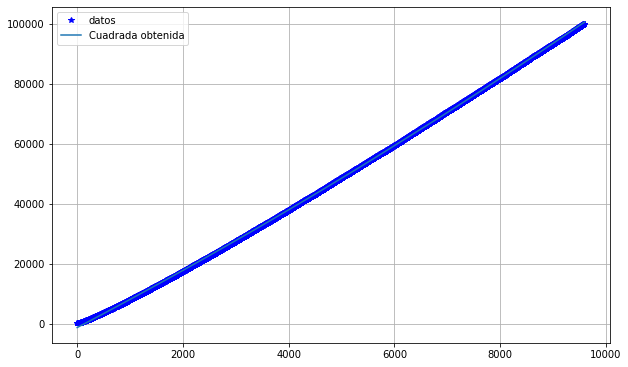

In [270]:
plt.figure(figsize=(10,6.18))
plt.plot(x,primos[:m],'b*', label='datos')
#plt.plot(x,yhat3, label='Cuartica obtenida')
plt.plot(x,np.round(yhat2), label='Cuadrada obtenida')
#plt.plot(x, x**2, label='Cuadrada estándar')
plt.legend(loc='best')
plt.grid()
plt.show()

In [271]:
yhat2[-1],primos[m-1:m]

(100468.0, [99991])

In [272]:
np.sum(np.abs(yhat2-primos[:m]))/m

207.3603002502085

## Usando Redes neuronales

In [273]:
import pandas as pd
import random
#from statsmodels.tools.eval_measures import rmse
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation, Flatten
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.layers import Bidirectional

In [286]:
pd_primos = pd.DataFrame(primos)
#pd_primos.to_csv('numprimos.csv', index == False)
pd_primos = pd_primos.rename(columns={0:'Primo'})
pd_primos

,Primo
0,2
1,3
2,5
3,7
4,11
...,...
9587,99929
9588,99961
9589,99971
9590,99989


In [287]:
scaler = MinMaxScaler()
pd_primosM= pd.DataFrame(scaler.fit_transform(pd_primos), columns = pd_primos.columns)
pd_primosM

,Primo
0,0.00000
1,0.00001
2,0.00003
3,0.00005
4,0.00009
...,...
9587,0.99938
9588,0.99970
9589,0.99980
9590,0.99998


In [328]:
def total_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
    
        seq_x, seq_y = sequence.iloc[i:end_ix].values, sequence.iloc[end_ix].values
        seq_x = [l.tolist() for l in seq_x]
        seq_y = [l.tolist() for l in seq_y]
        X.append(seq_x)
        y.append(seq_y)
    X = np.array(X)
    y = np.array(y)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    return X, y

In [377]:
def split_sequence(sequence, n_steps, n_features = 1 ):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix].values, sequence[end_ix:end_ix+1].values
        X.append(seq_x)
        y.append(seq_y)
    X = np.array(X)
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    return X, np.array(y)

In [437]:
n_steps, n_features = 4, 1
#X, y = split_sequence(pd_primosM, n_steps, n_features)
X, y = total_sequence(pd_primosM, n_steps)

In [419]:
X[1], y[1]

(array([[1.00011001e-05],
        [3.00033004e-05],
        [5.00055006e-05],
        [9.00099011e-05]]),
 array([0.00011001]))

In [421]:
#z = list(zip(X, y))
#random.shuffle(z)
#X, y = zip(*z)
#X, y = np.array(X), np.array(y)

In [438]:
X[1],y[1],X.shape, y.shape

(array([[1.00011001e-05],
        [3.00033004e-05],
        [5.00055006e-05],
        [9.00099011e-05]]),
 array([0.00011001]),
 (9588, 4, 1),
 (9588, 1))

In [445]:
model_close = Sequential()
model_close.add(LSTM(100, activation='relu',input_shape=(4, 1)))
model_close.add(Dropout(0.2))
model_close.add(Dense(1))
model_close.compile(optimizer='adam', loss='mse')
# fit model
model_close.fit(X[:-400], y[:-400], batch_size=256, epochs=50,verbose = 1)

Train on 9188 samples
Epoch 1/50
9188/9188 [==============================] - 1s 142us/sample - loss: 0.1339
Epoch 2/50
9188/9188 [==============================] - 0s 42us/sample - loss: 0.0074
Epoch 3/50
9188/9188 [==============================] - 0s 42us/sample - loss: 0.0040
Epoch 4/50
9188/9188 [==============================] - 0s 42us/sample - loss: 0.0035
Epoch 5/50
9188/9188 [==============================] - 0s 43us/sample - loss: 0.0033
Epoch 6/50
9188/9188 [==============================] - 0s 43us/sample - loss: 0.0031
Epoch 7/50
9188/9188 [==============================] - 0s 43us/sample - loss: 0.0031
Epoch 8/50
9188/9188 [==============================] - 0s 42us/sample - loss: 0.0030
Epoch 9/50
9188/9188 [==============================] - 0s 43us/sample - loss: 0.0030
Epoch 10/50
9188/9188 [==============================] - 0s 42us/sample - loss: 0.0028
Epoch 11/50
9188/9188 [==============================] - 0s 42us/sample - loss: 0.0027
Epoch 12/50
9188/9188 [======

In [453]:
predictions_close = model_close.predict(X[-400:]) 
mae =  mean_absolute_error(predictions_close, y[-400:])
round(mae,4)

0.0149

In [454]:
pd_final = pd_primosM.copy()
pd_final.predictions = None
predictions = pd.DataFrame(predictions_close, index = pd_primosM[-(len(predictions_close)+1):-1].index,columns=['Predictions'])
pd_final['Prediction'] = predictions
pd_final.loc[pd_final.index[-1], 'Prediction'] = model_close.predict(np.array(pd_final.Primo[-4:]).reshape((1,4,1)))[0][0]

In [455]:
pd_final.tail(15)

,Primo,Prediction
9577,0.99838,0.985116
9578,0.99842,0.985184
9579,0.99848,0.985243
9580,0.99868,0.985328
9581,0.99880,0.985433
9582,0.99886,0.985554
9583,0.99890,0.985680
9584,0.99910,0.985785
9585,0.99916,0.985880
9586,0.99932,0.985998


In [456]:
pd_final = pd.DataFrame(scaler.inverse_transform(pd_final), columns = pd_final.columns)
pd_final.Prediction = np.round(pd_final.Prediction)
pd_final.tail()

,Primo,Prediction
9587,99929.0,98605.0
9588,99961.0,98619.0
9589,99971.0,98636.0
9590,99989.0,98654.0
9591,99991.0,98672.0


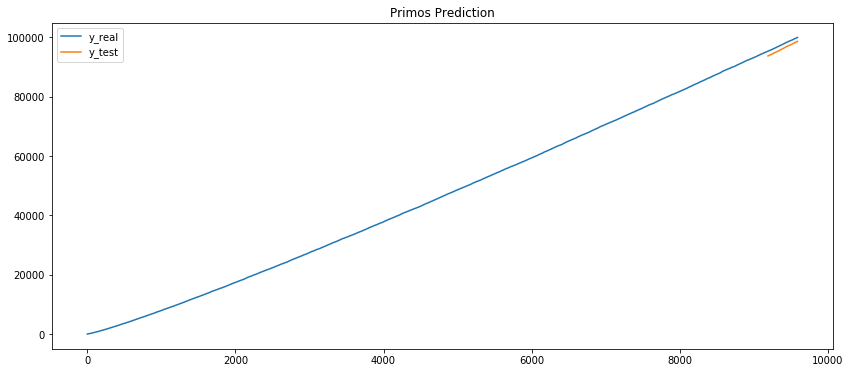

In [460]:
plt.figure(figsize=(14,6))
plt.title('Primos Prediction')
pd_primos.Primo[:].plot(label = 'y_real')
pd_final.Prediction[-400:].plot(label = 'y_test')
plt.legend(loc='best')

## Time Series 2.0

In [503]:
import tensorflow as tf

In [574]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

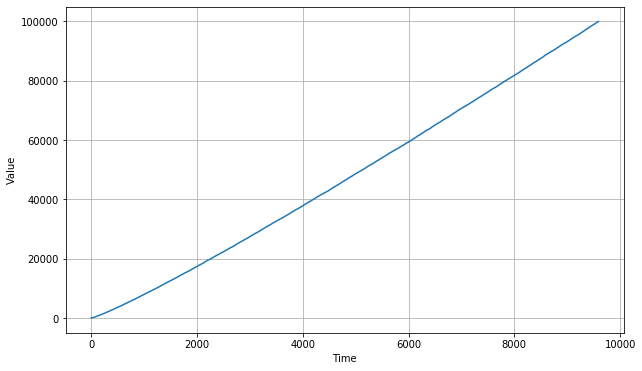

In [575]:
time_step = []
temps = []

with open('numprimos.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    time = 0
    for row in reader:
        time_step.append(int(time))
        temps.append(float(row[0]))
        time += 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [576]:
maximo = series.max()
maximo

99991.0

In [584]:
series = series/series.max()
series

array([2.00018002e-05, 3.00027002e-05, 5.00045004e-05, ...,
       9.99799982e-01, 9.99979998e-01, 1.00000000e+00])

In [585]:
split_time = 8000

time_train = primos[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [586]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [587]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [588]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
shuffle_buffer_size = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(8000,)


In [611]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=60, kernel_size=30,strides=1, padding="causal",activation="relu",input_shape=[None, 1]),
    #tf.keras.layers.GRU(60, return_sequences = True),
    #tf.keras.layers.Conv1D(filters=3, kernel_size=5,strides=1, padding="causal"),
    tf.keras.layers.LSTM(60, return_sequences= True),
    tf.keras.layers.LSTM(60),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1),
    #tf.keras.layers.Lambda( lambda x : x * 20)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=50,callbacks=[lr_schedule])

Epoch 1/50
31/31 [==============================] - 13s 411ms/step - loss: 0.1197 - mae: 0.4164
Epoch 2/50
31/31 [==============================] - 8s 270ms/step - loss: 0.1197 - mae: 0.4164
Epoch 3/50
31/31 [==============================] - 8s 257ms/step - loss: 0.1197 - mae: 0.4164
Epoch 4/50
31/31 [==============================] - 9s 275ms/step - loss: 0.1197 - mae: 0.4164
Epoch 5/50
31/31 [==============================] - 9s 283ms/step - loss: 0.1197 - mae: 0.4164
Epoch 6/50
31/31 [==============================] - 8s 257ms/step - loss: 0.1197 - mae: 0.4164
Epoch 7/50
31/31 [==============================] - 8s 265ms/step - loss: 0.1197 - mae: 0.4164
Epoch 8/50
 9/31 [=======>......................] - ETA: 6s - loss: 0.0095 - mae: 0.1154

KeyboardInterrupt: 

In [601]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

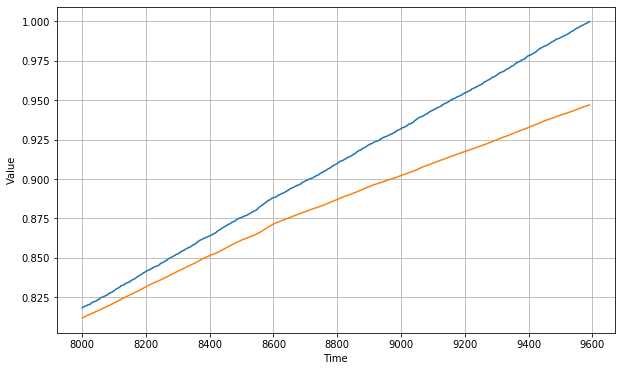

In [609]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [603]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

0.025292605

In [604]:
print(rnn_forecast)

[0.8118389  0.8119316  0.8120262  ... 0.9469091  0.94697547 0.9470435 ]


<Figure size 432x288 with 0 Axes>

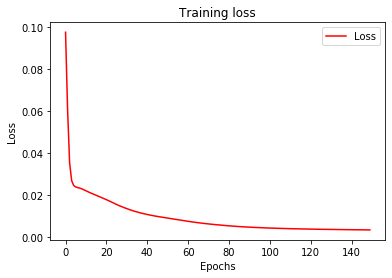

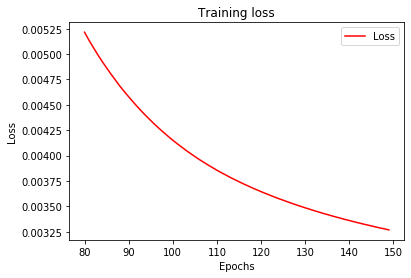

<Figure size 432x288 with 0 Axes>

In [607]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()


plt.plot(epochs[80:], loss[80:], 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()